# AutoMPC Demo

Welcome!  This notebook demonstrates the core features of AutoMPC.  We will use the Cart-Pole swing-up task as an example, and we will tune an MPC pipeline consisting of a multi-layer perception (MLP) system ID model and an iLQR optimizer.

## Set-Up

To begin, we need an input dataset and specifications for the system and task.  The `benchmarks` module provides these for a few example systems.

In [1]:
import os
os.chdir("..")
import autompc as ampc
import numpy as np
from autompc.benchmarks import CartpoleSwingupBenchmark

benchmark = CartpoleSwingupBenchmark()


# Get system and task specification
system = benchmark.system
task   = benchmark.task

# Generate benchmark dataset
trajs = benchmark.gen_trajs(seed=100, n_trajs=10, traj_len=200)

Next, we need to declare our MPC pipeline.  The following code initializes a pipeline with a MLP system ID model, a quadratic objective function, and and an iLQR optimizer.

In [2]:
from autompc.sysid import MLPFactory
from autompc.control import IterativeLQRFactory
from autompc.costs import QuadCostFactory

model_factory = MLPFactory(system)
ctrlr_factory = IterativeLQRFactory(system)
cost_factory  = QuadCostFactory(system)

pipeline = ampc.Pipeline(system, model_factory, ctrlr_factory, cost_factory)

We can view the joint configuration space of the pipeline

In [3]:
pipeline.get_configuration_space()

Configuration space object:
  Hyperparameters:
    _cost:dx_F, Type: UniformFloat, Range: [0.001, 10000.0], Default: 1.0, on log-scale
    _cost:dx_Q, Type: UniformFloat, Range: [0.001, 10000.0], Default: 1.0, on log-scale
    _cost:omega_F, Type: UniformFloat, Range: [0.001, 10000.0], Default: 1.0, on log-scale
    _cost:omega_Q, Type: UniformFloat, Range: [0.001, 10000.0], Default: 1.0, on log-scale
    _cost:theta_F, Type: UniformFloat, Range: [0.001, 10000.0], Default: 1.0, on log-scale
    _cost:theta_Q, Type: UniformFloat, Range: [0.001, 10000.0], Default: 1.0, on log-scale
    _cost:u_R, Type: UniformFloat, Range: [0.001, 10000.0], Default: 1.0, on log-scale
    _cost:x_F, Type: UniformFloat, Range: [0.001, 10000.0], Default: 1.0, on log-scale
    _cost:x_Q, Type: UniformFloat, Range: [0.001, 10000.0], Default: 1.0, on log-scale
    _ctrlr:horizon, Type: UniformInteger, Range: [5, 25], Default: 20
    _model:hidden_size_1, Type: UniformInteger, Range: [16, 256], Default: 128
   

## Tuning

Once we have initialized the pipeline and its factories, it is straightforward to set up a tuner to search the configuration space.  Here we use an MLP model for the surrogate model.  This is an example of full pipeline which searches the configuration space of all pipeline components simultaneously.

In [4]:
from autompc.tuning import PipelineTuner

tuner = PipelineTuner(surrogate_factory=MLPFactory(system), surrogate_split=0.5)

controller, tune_result = tuner.run(pipeline, task, trajs, n_iters=100, rng=np.random.default_rng(100), 
                                   truedyn=benchmark.dynamics)

/usr/lib/python3/dist-packages/pyparsing.py:1745: FutureWarning: Possible set intersection at position 3
  self.re = re.compile( self.reString )
/home/william/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:01<00:00, 27.58it/s]

INFO:smac.utils.io.cmd_reader.CMDReader:Output to smac3-output_2021-04-26_03:19:53_290672
INFO:smac.facade.smac_hpo_facade.SMAC4HPO:Optimizing a deterministic scenario for quality without a tuner timeout - will make SMAC deterministic and only evaluate one configuration per iteration!
INFO:smac.initial_design.sobol_design.SobolDesign:Running initial design for 25 configurations
INFO:smac.facade.smac_hpo_facade.SMAC4HPO:<class 'smac.facade.smac_hpo_facade.SMAC4HPO'>
INFO:smac.optimizer.smbo.SMBO:Running initial design


INFO:smac.intensification.intensification.Intensifier:First run, no incumbent provided; challenger is assumed to be the incumbent


use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.75it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:10<00:00, 19.39it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:10<00:00, 19.53it/s]

INFO:smac.intensification.intensification.Intensifier:First run, no incumbent provided; challenger is assumed to be the incumbent
INFO:smac.intensification.intensification.Intensifier:Updated estimated cost of incumbent on 1 runs: 200.0000



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.57it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:09<00:00, 21.64it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:08<00:00, 22.00it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 46.939164 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  9.01it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:38<00:00,  5.11it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:19<00:00, 10.24it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 63.714123 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 20.15it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:29<00:00,  6.67it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:45<00:00,  4.36it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 77.658012 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.33it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:12<00:00, 16.20it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:09<00:00, 21.09it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 26.504608 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.93it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 28.10it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 28.49it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 17.638772 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.99it/s]
Simulating Surrogate Trajectory: 
  2%|▎         | 5/200 [00:00<00:09, 20.95it/s]

/home/william/proj/autompc_dev/autompc/control/ilqr.py:517: RuntimeWarning: invalid value encountered in double_scalars
  if (obj - new_obj) / (-expect_cost_reduction) > ls_cost_threshold:


 99%|█████████▉| 198/200 [00:06<00:00, 31.51it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.21it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 18.047097 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.50it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:05<00:00, 35.79it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:05<00:00, 36.33it/s]


INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 15.802694 sec, available: 0.000010 sec)


use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 18.98it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:14<00:00, 14.09it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.03it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 22.921563 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.43it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 23.40it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:08<00:00, 22.64it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 23.194876 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.73it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:49<00:00,  3.97it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:53<00:00,  3.67it/s]

INFO:smac.intensification.intensification.Intensifier:Challenger (105.0000) is better than incumbent (200.0000) on 1 runs.
INFO:smac.intensification.intensification.Intensifier:Changes in incumbent:
INFO:smac.intensification.intensification.Intensifier:  _cost:dx_F : 3.1622776601683813 -> 1.1547819846894585
INFO:smac.intensification.intensification.Intensifier:  _cost:dx_Q : 3.1622776601683813 -> 8.659643233600653
INFO:smac.intensification.intensification.Intensifier:  _cost:omega_F : 3.1622776601683813 -> 0.0027384196342643626
INFO:smac.intensification.intensification.Intensifier:  _cost:omega_Q : 3.1622776601683813 -> 1.1547819846894585
INFO:smac.intensification.intensification.Intensifier:  _cost:theta_F : 3.1622776601683813 -> 486.9675251658636
INFO:smac.intensification.intensification.Intensifier:  _cost:theta_Q : 3.1622776601683813 -> 3651.7412725483823
INFO:smac.intensification.intensification.Intensifier:  _cost:u_R : 3.1622776601683813 -> 0.1539926526059493
INFO:smac.intensifi


use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 16.96it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:48<00:00,  4.05it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:51<00:00,  3.86it/s]

INFO:smac.intensification.intensification.Intensifier:Challenger (95.0000) is better than incumbent (105.0000) on 1 runs.
INFO:smac.intensification.intensification.Intensifier:Changes in incumbent:
INFO:smac.intensification.intensification.Intensifier:  _cost:dx_F : 1.1547819846894585 -> 0.1539926526059493
INFO:smac.intensification.intensification.Intensifier:  _cost:dx_Q : 8.659643233600653 -> 0.020535250264571463
INFO:smac.intensification.intensification.Intensifier:  _cost:omega_F : 0.0027384196342643626 -> 3651.7412725483823
INFO:smac.intensification.intensification.Intensifier:  _cost:omega_Q : 1.1547819846894585 -> 8.659643233600653
INFO:smac.intensification.intensification.Intensifier:  _cost:theta_F : 486.9675251658636 -> 1.1547819846894585
INFO:smac.intensification.intensification.Intensifier:  _cost:theta_Q : 3651.7412725483823 -> 486.9675251658636
INFO:smac.intensification.intensification.Intensifier:  _cost:u_R : 0.1539926526059493 -> 0.020535250264571463
INFO:smac.intensif


use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 22.34it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:35<00:00,  2.08it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:33<00:00,  2.12it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 191.064413 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:06<00:00,  8.28it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 22.62it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:08<00:00, 22.18it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 23.774093 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.29it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:09<00:00, 21.89it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:15<00:00, 12.48it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 28.734648 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.55it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 32.73it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.87it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 17.980302 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.42it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:14<00:00, 13.39it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:17<00:00, 11.28it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 36.130242 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.40it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:42<00:00,  4.62it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:56<00:00,  3.48it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 104.596755 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 21.84it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 28.66it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.69it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 15.309388 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.69it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:43<00:00,  4.59it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:18<00:00, 10.76it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 67.342714 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.08it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 30.40it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 28.29it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 17.391038 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.45it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:41<00:00,  4.79it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:07<00:00,  2.95it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 113.317132 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 21.35it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 24.65it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:10<00:00, 19.77it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 20.444596 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.83it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:09<00:00, 21.29it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:09<00:00, 21.37it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 22.235192 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.47it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:49<00:00,  3.99it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:52<00:00,  3.80it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 107.724461 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.54it/s]
Simulating Surrogate Trajectory: 
  3%|▎         | 6/200 [00:00<00:07, 24.86it/s]

/home/william/proj/autompc_dev/autompc/control/ilqr.py:517: RuntimeWarning: invalid value encountered in double_scalars
  if (obj - new_obj) / (-expect_cost_reduction) > ls_cost_threshold:


 99%|█████████▉| 198/200 [00:05<00:00, 34.36it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:05<00:00, 33.04it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 17.669165 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.69it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:17<00:00, 11.01it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:25<00:00,  7.73it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 47.320257 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.00it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:49<00:00,  3.97it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:43<00:00,  4.51it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 97.451605 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  9.15it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 28.00it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:08<00:00, 22.88it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 21.247335 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 18.38it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 31.27it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.40it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 15.219178 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  9.14it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:29<00:00,  6.70it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:56<00:00,  3.52it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 91.361830 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 11.05it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 22.47it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:13<00:00, 14.89it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 26.685103 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.61it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:22<00:00,  2.39it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:30<00:00,  2.19it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 177.844078 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.61it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:40<00:00,  4.91it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:29<00:00,  6.64it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 74.933313 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.95it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:54<00:00,  3.63it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:01<00:00,  3.24it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 120.341534 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.76it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:43<00:00,  4.52it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:44<00:00,  4.49it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 91.601705 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.96it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:02<00:00,  3.16it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:42<00:00,  4.63it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 109.936648 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.09it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:50<00:00,  3.95it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:42<00:00,  4.68it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 96.026769 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.72it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:55<00:00,  3.58it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:21<00:00,  2.43it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 141.475588 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.77it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:40<00:00,  4.86it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:04<00:00,  3.05it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 110.241425 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  9.05it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:43<00:00,  4.59it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:24<00:00,  2.34it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 133.305855 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.67it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:20<00:00,  9.77it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:18<00:00, 10.55it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 42.742495 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.68it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:48<00:00,  4.11it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:08<00:00,  2.89it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 121.332398 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.81it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:18<00:00, 10.51it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:12<00:00, 16.29it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 36.714407 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 20.71it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:11<00:00, 17.37it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:14<00:00, 13.94it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 28.071925 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.81it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:46<00:00,  4.30it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:35<00:00,  5.50it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 86.706090 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.63it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:02<00:00,  3.14it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:56<00:00,  3.49it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 124.527984 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.13it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:44<00:00,  4.45it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:25<00:00,  7.68it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 73.807760 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.93it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:20<00:00,  9.66it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:24<00:00,  8.06it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 49.688629 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 20.98it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 24.76it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:08<00:00, 23.51it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 18.860278 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.58it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:05<00:00,  3.02it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:59<00:00,  3.33it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 129.966485 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.90it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:47<00:00,  4.15it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:16<00:00,  2.59it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 128.936856 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.03it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:55<00:00,  3.60it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:27<00:00,  7.13it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 86.429145 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.58it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:19<00:00,  2.48it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:57<00:00,  3.43it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 143.470340 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.48it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:42<00:00,  4.62it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:16<00:00,  2.60it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 123.732083 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.72it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:01<00:00,  3.23it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:08<00:00,  2.90it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 134.193977 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.60it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:57<00:00,  3.43it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:08<00:00,  2.91it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 130.514486 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 19.37it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 23.98it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:08<00:00, 24.05it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 19.124847 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.66it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:11<00:00, 17.68it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:07<00:00, 25.27it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 23.778613 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.84it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:54<00:00,  3.62it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:00<00:00,  3.26it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 119.977158 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.75it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:48<00:00,  4.09it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:05<00:00,  3.01it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 118.941389 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.55it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:43<00:00,  4.59it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:42<00:00,  4.66it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 90.412815 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.09it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:13<00:00, 14.74it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:08<00:00, 23.57it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 25.438119 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.98it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:14<00:00,  2.66it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:07<00:00,  2.95it/s]

INFO:smac.intensification.intensification.Intensifier:Challenger (66.0000) is better than incumbent (95.0000) on 1 runs.
INFO:smac.intensification.intensification.Intensifier:Changes in incumbent:
INFO:smac.intensification.intensification.Intensifier:  _cost:dx_Q : 0.020535250264571463 -> 0.6100666122622698
INFO:smac.intensification.intensification.Intensifier:  _cost:u_R : 0.020535250264571463 -> 0.003251116412113908
INFO:smac.intensification.intensification.Intensifier:  _model:hidden_size_2 : 151 -> 175
INFO:smac.intensification.intensification.Intensifier:  _model:n_hidden_layers : '3' -> '2'
INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 145.391013 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.42it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:51<00:00,  3.81it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:31<00:00,  6.32it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 88.157969 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.87it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:17<00:00, 11.27it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:28<00:00,  6.95it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 49.730635 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.07it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:00<00:00,  3.25it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:13<00:00,  2.69it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 138.177714 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.92it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:56<00:00,  3.53it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:19<00:00,  2.49it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 138.950026 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.96it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:55<00:00,  3.56it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:09<00:00,  2.86it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 128.490370 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.84it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:06<00:00,  2.96it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:43<00:00,  4.53it/s]

INFO:smac.intensification.intensification.Intensifier:Challenger (63.0000) is better than incumbent (66.0000) on 1 runs.


INFO:smac.intensification.intensification.Intensifier:Changes in incumbent:
INFO:smac.intensification.intensification.Intensifier:  _cost:dx_F : 0.1539926526059493 -> 0.06729123861675651
INFO:smac.intensification.intensification.Intensifier:  _cost:dx_Q : 0.6100666122622698 -> 0.007623171730788891
INFO:smac.intensification.intensification.Intensifier:  _cost:omega_Q : 8.659643233600653 -> 20.904732734784798
INFO:smac.intensification.intensification.Intensifier:  _cost:theta_F : 1.1547819846894585 -> 1.1751525649463177
INFO:smac.intensification.intensification.Intensifier:  _cost:theta_Q : 486.9675251658636 -> 150.10641204627225
INFO:smac.intensification.intensification.Intensifier:  _cost:u_R : 0.003251116412113908 -> 0.003098236396753995
INFO:smac.intensification.intensification.Intensifier:  _model:hidden_size_1 : 211 -> 214
INFO:smac.intensification.intensification.Intensifier:  _model:hidden_size_2 : 175 -> 178
INFO:smac.intensification.intensification.Intensifier:Wallclock time li

use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.91it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [02:05<00:01,  1.58it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:56<00:01,  1.69it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 246.620699 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.34it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:02<00:00,  3.17it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:37<00:00,  5.23it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 106.330278 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.70it/s]
Simulating Surrogate Trajectory: 
  4%|▎         | 7/200 [00:00<00:06, 28.81it/s]

/home/william/proj/autompc_dev/autompc/control/ilqr.py:517: RuntimeWarning: invalid value encountered in double_scalars
  if (obj - new_obj) / (-expect_cost_reduction) > ls_cost_threshold:


 99%|█████████▉| 198/200 [00:06<00:00, 31.99it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.44it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 18.095365 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 22.11it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 23.46it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:09<00:00, 21.43it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 19.994713 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.66it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:09<00:00,  2.84it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:58<00:00,  3.37it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 132.124116 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.81it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:40<00:00,  4.94it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:44<00:00,  4.49it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 88.851950 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.85it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:59<00:00,  3.32it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:22<00:00,  2.40it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 145.831172 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.30it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:18<00:00,  2.52it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:13<00:00,  2.71it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 155.237886 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.88it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:55<00:00,  3.58it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:45<00:00,  4.39it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 104.062455 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:04<00:00, 10.75it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:59<00:00,  3.34it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:56<00:00,  3.50it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 120.446330 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.63it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:20<00:00,  2.47it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:58<00:00,  3.40it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 141.794200 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.89it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:29<00:00,  6.61it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:17<00:00, 11.15it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 51.376314 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.85it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:54<00:00,  3.62it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:39<00:00,  5.07it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 97.449389 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.85it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:02<00:00,  3.15it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:04<00:00,  3.08it/s]

INFO:smac.intensification.intensification.Intensifier:Challenger (42.0000) is better than incumbent (63.0000) on 1 runs.


INFO:smac.intensification.intensification.Intensifier:Changes in incumbent:
INFO:smac.intensification.intensification.Intensifier:  _cost:dx_F : 0.06729123861675651 -> 0.08264178020728319
INFO:smac.intensification.intensification.Intensifier:  _cost:dx_Q : 0.007623171730788891 -> 0.6100666122622698
INFO:smac.intensification.intensification.Intensifier:  _cost:omega_F : 3651.7412725483823 -> 4399.0272019485055
INFO:smac.intensification.intensification.Intensifier:  _cost:omega_Q : 20.904732734784798 -> 47.720881457373395
INFO:smac.intensification.intensification.Intensifier:  _cost:theta_F : 1.1751525649463177 -> 1.534014094248036
INFO:smac.intensification.intensification.Intensifier:  _cost:theta_Q : 150.10641204627225 -> 179.42842431521572
INFO:smac.intensification.intensification.Intensifier:  _cost:u_R : 0.003098236396753995 -> 0.0025442171616588084
INFO:smac.intensification.intensification.Intensifier:  _cost:x_F : 0.1539926526059493 -> 0.1487208580122095
INFO:smac.intensification.

use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.59it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:07<00:00,  2.93it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:49<00:00,  4.03it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 120.328099 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.34it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:51<00:00,  3.86it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:02<00:00,  3.16it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 117.774770 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.89it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:58<00:00,  3.37it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:47<00:00,  4.19it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 109.622269 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.97it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 26.27it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:07<00:00, 28.15it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 18.207337 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.80it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:11<00:00,  2.77it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:43<00:00,  4.57it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 118.517234 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.05it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:00<00:00,  3.28it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:52<00:00,  3.80it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 116.156884 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.06it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:56<00:00,  3.53it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:49<00:00,  4.01it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 109.174661 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 14.01it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:53<00:00,  3.71it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:02<00:00,  3.18it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 119.347302 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 20.99it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:50<00:00,  3.90it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:46<00:00,  4.24it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 99.809280 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.59it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:26<00:00,  2.28it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:12<00:00,  2.75it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 164.828425 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 20.77it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:38<00:00,  5.10it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:06<00:00,  2.98it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 107.729213 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.70it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:47<00:00,  4.17it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:45<00:00,  4.34it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 96.733999 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.82it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:37<00:00,  5.27it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:28<00:00,  6.83it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 70.244246 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:05<00:00,  8.61it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:51<00:00,  3.85it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:52<00:00,  3.74it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 110.211521 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.94it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:53<00:00,  3.72it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:05<00:00,  3.01it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 122.610248 sec, available: 0.000010 sec)



use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.78it/s]
Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:27<00:00,  7.29it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:44<00:00,  4.44it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 75.473826 sec, available: 0.000010 sec)
INFO:smac.stats.stats.Stats:##########################################################
INFO:smac.stats.stats.Stats:Statistics:
INFO:smac.stats.stats.Stats:#Incumbent changed: 5
INFO:smac.stats.stats.Stats:#Submitted target algorithm runs: 100 / 100.0
INFO:smac.stats.stats.Stats:#Finished target algorithm runs: 100 / 100.0
INFO:smac.stats.stats.Stats:#Configurations: 100
INFO:smac.stats.stats.Stats:Used wallclock time: 8670.12 / inf sec 
INFO:smac.stats.stats.Stats:Used target algorithm runtime: 8558.12 / inf sec
INFO:smac.stats.stats.Stats:##########################################################
INFO:smac.facade.smac_hpo_facade.SMAC4HPO:Final Incumbent: Configuration:
  _cost:dx_F, Value: 0.08264178020728319
  _cost:dx_Q, Value: 0.6100666122622698
  _cost:omega_F, Value: 4399.0272019485055
  _cost:omega_Q, Value: 47.720881457373395
  _c


use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.74it/s]


It is then easy to plot the curve from the tuning result.

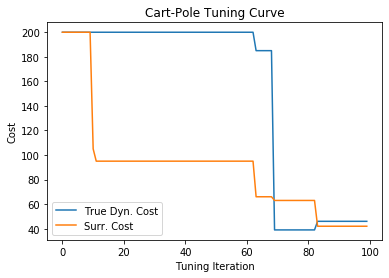

In [5]:
from autompc.graphs import TuningCurveGraph
import matplotlib.pyplot as plt

graph = TuningCurveGraph()

fig = plt.figure()      
ax = fig.gca()
graph(ax, tune_result)
ax.set_title("Cart-Pole Tuning Curve")
plt.show()

We can then use the resulting controller to simulate a trajectory. For example,

In [6]:
traj = ampc.simulate(controller, init_obs=np.array([1.0, 0.0, 0.0, 0.0]), max_steps=200, dynamics=benchmark.dynamics)

100%|██████████| 200/200 [00:57<00:00,  3.47it/s]


## Decoupled Tuning

The above examples is full pipeline tuning, which searches the configuration space of all components simultaneously.  Alternatively, we can take a decoupled tuning approach, where the model is first tuned based on prediction accuracy, then the objective function and optimizer are tuned.

First, we must tune the model

In [7]:
from autompc.tuning import ModelTuner
from autompc.evaluation import HoldoutModelEvaluator

model_evaluator = HoldoutModelEvaluator(holdout_prop=0.25, metric="rmse", trajs=trajs, system=system,
                                       rng=np.random.default_rng(100))
model_tuner = ModelTuner(system, model_evaluator)
model_tuner.add_model_factory(model_factory)

model, model_tune_result = model_tuner.run(rng=np.random.default_rng(100), n_iters=2)

INFO:smac.utils.io.cmd_reader.CMDReader:Output to smac3-output_2021-04-26_05:45:25_304815
INFO:smac.facade.smac_hpo_facade.SMAC4HPO:Optimizing a deterministic scenario for quality without a tuner timeout - will make SMAC deterministic and only evaluate one configuration per iteration!
INFO:smac.initial_design.sobol_design.SobolDesign:Running initial design for 1 configurations
INFO:smac.facade.smac_hpo_facade.SMAC4HPO:<class 'smac.facade.smac_hpo_facade.SMAC4HPO'>
INFO:smac.optimizer.smbo.SMBO:Running initial design
INFO:smac.intensification.intensification.Intensifier:First run, no incumbent provided; challenger is assumed to be the incumbent


Evaluating cfg:
Configuration:
  _MLP:hidden_size_1, Value: 136
  _MLP:hidden_size_2, Value: 136
  _MLP:hidden_size_3, Value: 136
  _MLP:lr, Value: 0.003162277660168379
  _MLP:n_hidden_layers, Value: '3'
  _MLP:nonlintype, Value: 'sigmoid'
  model, Value: 'MLP'

use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:03<00:00, 13.70it/s]

INFO:smac.intensification.intensification.Intensifier:First run, no incumbent provided; challenger is assumed to be the incumbent
INFO:smac.intensification.intensification.Intensifier:Updated estimated cost of incumbent on 1 runs: 0.5995



Evaluating cfg:
Configuration:
  _MLP:hidden_size_1, Value: 163
  _MLP:lr, Value: 0.0001970689002759384
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'selu'
  model, Value: 'MLP'

use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:01<00:00, 27.19it/s]

INFO:smac.intensification.intensification.Intensifier:Challenger (0.3909) is better than incumbent (0.5995) on 1 runs.
INFO:smac.intensification.intensification.Intensifier:Changes in incumbent:
INFO:smac.intensification.intensification.Intensifier:  _MLP:hidden_size_1 : 136 -> 163
INFO:smac.intensification.intensification.Intensifier:  _MLP:lr : 0.003162277660168379 -> 0.0001970689002759384
INFO:smac.intensification.intensification.Intensifier:  _MLP:n_hidden_layers : '3' -> '1'
INFO:smac.intensification.intensification.Intensifier:  _MLP:nonlintype : 'sigmoid' -> 'selu'
INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 5.502190 sec, available: 0.000010 sec)


INFO:smac.stats.stats.Stats:##########################################################
INFO:smac.stats.stats.Stats:Statistics:
INFO:smac.stats.stats.Stats:#Incumbent changed: 1
INFO:smac.stats.stats.Stats:#Submitted target algorithm runs: 2 / 2.0
INFO:smac.stats.stats.Stats:#Finished target algorithm runs: 2 / 2.0
INFO:smac.stats.stats.Stats:#Configurations: 2
INFO:smac.stats.stats.Stats:Used wallclock time: 6.00 / inf sec 
INFO:smac.stats.stats.Stats:Used target algorithm runtime: 5.50 / inf sec
INFO:smac.stats.stats.Stats:##########################################################
INFO:smac.facade.smac_hpo_facade.SMAC4HPO:Final Incumbent: Configuration:
  _MLP:hidden_size_1, Value: 163
  _MLP:lr, Value: 0.0001970689002759384
  _MLP:n_hidden_layers, Value: '1'
  _MLP:nonlintype, Value: 'selu'
  model, Value: 'MLP'

INFO:smac.facade.smac_hpo_facade.SMAC4HPO:Estimated cost of incumbent: 0.390941


use_cuda=True
MLP Using Cuda
100%|██████████| 50/50 [00:02<00:00, 19.05it/s]


Now that we have tuned the model, we can create a pipeline with the pre-tuned model, and then run pipeline tuning.

In [8]:
pipeline_fixed_model = ampc.Pipeline(system, model, ctrlr_factory, cost_factory)
controller2, tune_result2 = tuner.run(pipeline_fixed_model, task, trajs, n_iters=100, rng=np.random.default_rng(100), 
                                   truedyn=benchmark.dynamics)

use_cuda=True
MLP Using Cuda
  6%|▌         | 3/50 [00:00<00:01, 29.51it/s]

/home/william/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


100%|██████████| 50/50 [00:01<00:00, 27.13it/s]

INFO:smac.utils.io.cmd_reader.CMDReader:Output to smac3-output_2021-04-26_05:45:36_080182
INFO:smac.facade.smac_hpo_facade.SMAC4HPO:Optimizing a deterministic scenario for quality without a tuner timeout - will make SMAC deterministic and only evaluate one configuration per iteration!
INFO:smac.initial_design.sobol_design.SobolDesign:Running initial design for 25 configurations
INFO:smac.facade.smac_hpo_facade.SMAC4HPO:<class 'smac.facade.smac_hpo_facade.SMAC4HPO'>
INFO:smac.optimizer.smbo.SMBO:Running initial design


INFO:smac.intensification.intensification.Intensifier:First run, no incumbent provided; challenger is assumed to be the incumbent


Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 22.68it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:08<00:00, 24.23it/s]

INFO:smac.intensification.intensification.Intensifier:First run, no incumbent provided; challenger is assumed to be the incumbent
INFO:smac.intensification.intensification.Intensifier:Updated estimated cost of incumbent on 1 runs: 200.0000



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 27.03it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:07<00:00, 25.31it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 32.149774 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:39<00:00,  5.03it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:33<00:00,  5.88it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 73.106620 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:38<00:00,  5.12it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:27<00:00,  7.16it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 66.363411 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 27.43it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.91it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 13.283866 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 30.62it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 31.58it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.786002 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:31<00:00,  6.24it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:28<00:00,  6.96it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 60.222050 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:59<00:00,  3.35it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:03<00:00,  3.14it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 122.137337 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:10<00:00, 18.58it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 30.63it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 17.169733 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 27.12it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.39it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 13.462475 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:23<00:00,  8.50it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:31<00:00,  6.36it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 54.532355 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:15<00:00, 12.54it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:15<00:00, 13.12it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 30.922933 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:34<00:00,  5.80it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:33<00:00,  5.90it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 67.754879 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 32.46it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.90it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.166729 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:30<00:00,  6.51it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 31.68it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 36.696463 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:10<00:00, 18.12it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:10<00:00, 19.21it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 21.283694 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:34<00:00,  5.77it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:29<00:00,  6.60it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 64.363914 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:29<00:00,  6.69it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:32<00:00,  6.09it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 62.132394 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 31.33it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.91it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.385360 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:10<00:00, 18.30it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:10<00:00, 19.51it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 21.020182 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:12<00:00,  2.75it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:04<00:00,  3.06it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 136.766484 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:26<00:00,  7.35it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:18<00:00, 10.58it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 45.714454 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 29.47it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:07<00:00, 25.36it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 14.575147 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:30<00:00,  6.56it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:29<00:00,  6.74it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 59.621483 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:31<00:00,  6.32it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:27<00:00,  7.13it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 59.122044 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 30.43it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 31.73it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.797321 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 23.44it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.56it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 14.578761 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 31.50it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.74it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.382596 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 27.99it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.63it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 13.190334 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:48<00:00,  4.08it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:44<00:00,  4.48it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 92.774494 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:39<00:00,  5.06it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:36<00:00,  5.40it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 75.824233 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:11<00:00, 16.51it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:10<00:00, 19.54it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 22.174476 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:55<00:00,  3.55it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:45<00:00,  4.32it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 101.695488 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:19<00:00, 10.00it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:13<00:00, 14.71it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 33.312338 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 30.93it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 31.30it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.777899 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 29.49it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.37it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.880365 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:13<00:00, 14.78it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:17<00:00, 11.19it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 31.137890 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:26<00:00,  7.36it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:20<00:00,  9.89it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 46.980963 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:57<00:00,  3.45it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:54<00:00,  3.64it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 111.775913 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:32<00:00,  6.07it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:16<00:00, 11.75it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 49.533104 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:25<00:00,  7.81it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:18<00:00, 10.79it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 43.738078 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:23<00:00,  8.59it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:39<00:00,  4.96it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 62.993747 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:10<00:00, 19.31it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.28it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 16.440043 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 27.62it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 29.07it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 14.032327 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:14<00:00, 13.65it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:16<00:00, 11.85it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 31.258813 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 26.52it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.58it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 13.593646 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:31<00:00,  6.28it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:32<00:00,  6.07it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 64.180198 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:36<00:00,  5.42it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:37<00:00,  5.33it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 73.736136 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:31<00:00,  6.29it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:35<00:00,  5.59it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 66.976001 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:55<00:00,  3.58it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:00<00:00,  3.25it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 116.394130 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:26<00:00,  7.46it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:11<00:00, 17.46it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 37.926336 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:16<00:00, 11.76it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:15<00:00, 13.18it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 31.912841 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:09<00:00, 21.18it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:10<00:00, 19.80it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 19.398963 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 24.49it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.25it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 14.274986 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:38<00:00,  5.10it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:52<00:00,  3.80it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 90.887290 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:22<00:00,  8.75it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:21<00:00,  9.31it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 43.948153 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:16<00:00, 11.87it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:20<00:00,  9.68it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 37.202058 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 31.06it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.74it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.472830 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:10<00:00, 19.24it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:10<00:00, 18.89it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 20.822810 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:43<00:00,  4.55it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:27<00:00,  7.33it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 70.608890 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:19<00:00, 10.07it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:09<00:00, 21.65it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 28.859673 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 29.76it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:05<00:00, 33.31it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.648875 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:44<00:00,  4.47it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:30<00:00,  6.43it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 75.162272 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:58<00:00,  3.36it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:09<00:00,  2.84it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 128.866336 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:01<00:00,  3.23it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:01<00:00,  3.21it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 123.134075 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:30<00:00,  6.43it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:42<00:00,  4.62it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 73.679634 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:09<00:00, 20.66it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.52it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 15.724024 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:23<00:00,  2.38it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:23<00:00,  2.37it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 166.861500 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 23.98it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 29.18it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 15.091156 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:24<00:00,  8.23it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:21<00:00,  9.39it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 45.177556 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:15<00:00, 12.70it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:15<00:00, 13.15it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 30.697612 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:26<00:00,  7.50it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:28<00:00,  6.94it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 54.978709 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:31<00:00,  6.34it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:34<00:00,  5.75it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 65.744433 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:05<00:00, 33.26it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.80it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.039863 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 26.86it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.59it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 13.497466 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:39<00:00,  5.04it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:33<00:00,  5.90it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 72.905454 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 29.21it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 30.69it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 13.280998 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:07<00:00, 27.88it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 30.84it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 13.574068 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:41<00:00,  4.77it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:24<00:00,  8.17it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 65.773971 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:15<00:00, 12.71it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:17<00:00, 11.61it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 32.691887 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 28.31it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.62it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 13.112336 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 31.15it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 32.68it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.463759 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:06<00:00, 29.94it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 31.80it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 12.888730 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:40<00:00,  4.95it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:34<00:00,  5.82it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 74.087223 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:08<00:00, 23.43it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 30.61it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 14.968976 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:26<00:00,  7.46it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:14<00:00, 13.76it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 40.982974 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [01:07<00:00,  2.93it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [01:11<00:00,  2.76it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 139.413869 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:46<00:00,  4.24it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:42<00:00,  4.66it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 89.247481 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:13<00:00, 14.84it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:14<00:00, 13.24it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 28.344078 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:32<00:00,  6.11it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:29<00:00,  6.78it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 61.699632 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:12<00:00, 15.87it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:18<00:00, 10.82it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 30.818925 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:42<00:00,  4.68it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:25<00:00,  7.79it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 67.768919 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:38<00:00,  5.10it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:42<00:00,  4.66it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 81.375034 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:45<00:00,  4.37it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:48<00:00,  4.11it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 93.555832 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:40<00:00,  4.83it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:36<00:00,  5.40it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 77.723060 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:18<00:00, 10.89it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:13<00:00, 14.45it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 31.939206 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:11<00:00, 17.31it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:06<00:00, 31.57it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 17.756822 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:49<00:00,  3.99it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:39<00:00,  4.98it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 89.417357 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:35<00:00,  5.65it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:38<00:00,  5.17it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 73.387767 sec, available: 0.000010 sec)



Simulating Surrogate Trajectory: 
 99%|█████████▉| 198/200 [00:49<00:00,  4.00it/s]
Simulating True Dynamics Trajectory
 99%|█████████▉| 198/200 [00:46<00:00,  4.26it/s]

INFO:smac.intensification.intensification.Intensifier:Wallclock time limit for intensification reached (used: 96.012736 sec, available: 0.000010 sec)
INFO:smac.stats.stats.Stats:##########################################################
INFO:smac.stats.stats.Stats:Statistics:
INFO:smac.stats.stats.Stats:#Incumbent changed: 0
INFO:smac.stats.stats.Stats:#Submitted target algorithm runs: 100 / 100.0
INFO:smac.stats.stats.Stats:#Finished target algorithm runs: 100 / 100.0
INFO:smac.stats.stats.Stats:#Configurations: 100
INFO:smac.stats.stats.Stats:Used wallclock time: 4971.96 / inf sec 
INFO:smac.stats.stats.Stats:Used target algorithm runtime: 4843.58 / inf sec
INFO:smac.stats.stats.Stats:##########################################################
INFO:smac.facade.smac_hpo_facade.SMAC4HPO:Final Incumbent: Configuration:
  _cost:dx_F, Value: 3.1622776601683813
  _cost:dx_Q, Value: 3.1622776601683813
  _cost:omega_F, Value: 3.1622776601683813
  _cost:omega_Q, Value: 3.1622776601683813
  _co